# Gestion des modèles avec MLflow

Dans ce chapitre, vous découvrirez les différentes fonctionnalités de gestion des modèles dans MLflow. Vous découvrirez le cycle de vie du modèle dans MLflow et nous expliquerons comment l'intégrer à votre flux de travail de développement habituel et comment créer des modèles personnalisés non disponibles dans MLflow. 

Un cycle de vie de modèle sera introduit parallèlement à la fonction de registre de modèles de MLflow. Plus précisément, nous examinerons les sections suivantes de ce chapitre :

* Comprendre les modèles dans MLflow
* Explorer les saveurs des modèles dans MLflow
* Gestion des modèles et des schémas de signature
* Gestion du cycle de vie avec un registre de modèles 

Du point de vue de l'atelier, nous aimerions utiliser MLflow pour gérer nos modèles et mettre en œuvre un cycle de vie de modèle clair. L'ajout de fonctionnalités de modèle géré à notre référence en tirant parti de MLflow améliorera la qualité et les opérations de notre solution d'ingénierie d'apprentissage automatique.

## Comprendre les modèles dans MLflow

Sur la plate-forme MLflow, vous disposez de deux composants principaux pour gérer les modèles :

* Modèles : ce module gère le format, la bibliothèque et le module d'application des normes sur la plate-forme. Il prend en charge une variété de modèles d'apprentissage automatique les plus utilisés : sklearn, XGBoost, TensorFlow, H20, fastai et autres. Il possède des fonctionnalités pour gérer les schémas de sortie et d'entrée des modèles et pour faciliter le déploiement. 

* Registre de modèles : ce module gère le cycle de vie d'un modèle, depuis l'enregistrement et le marquage des métadonnées du modèle afin qu'il puisse être récupéré par les systèmes pertinents. Il prend en charge des modèles dans différents états, par exemple, le développement en direct, les tests et la production.

Un modèle MLflow est à la base un format d'emballage pour les modèles. L'objectif principal de l'empaquetage de modèle MLflow est de découpler le type de modèle de l'environnement qui exécute le modèle. Une bonne analogie avec un modèle MLflow est que c'est un peu comme un Dockerfile pour un modèle, où vous décrivez les métadonnées du modèle, et les outils de déploiement en amont sont capables d'interagir avec le modèle en fonction de la spécification. peut être vu dans le diagramme de la figure 5.1, d'un côté vous avez votre bibliothèque de modèles, par exemple, TensorFlow ou sklearn. 

Au cœur de MLfmow, vous avez le format de modèle MLflow, qui peut être servi dans une multitude de saveurs (formats de modèle) pour répondre à différents types d'outils d'inférence sur site et dans le cloud :

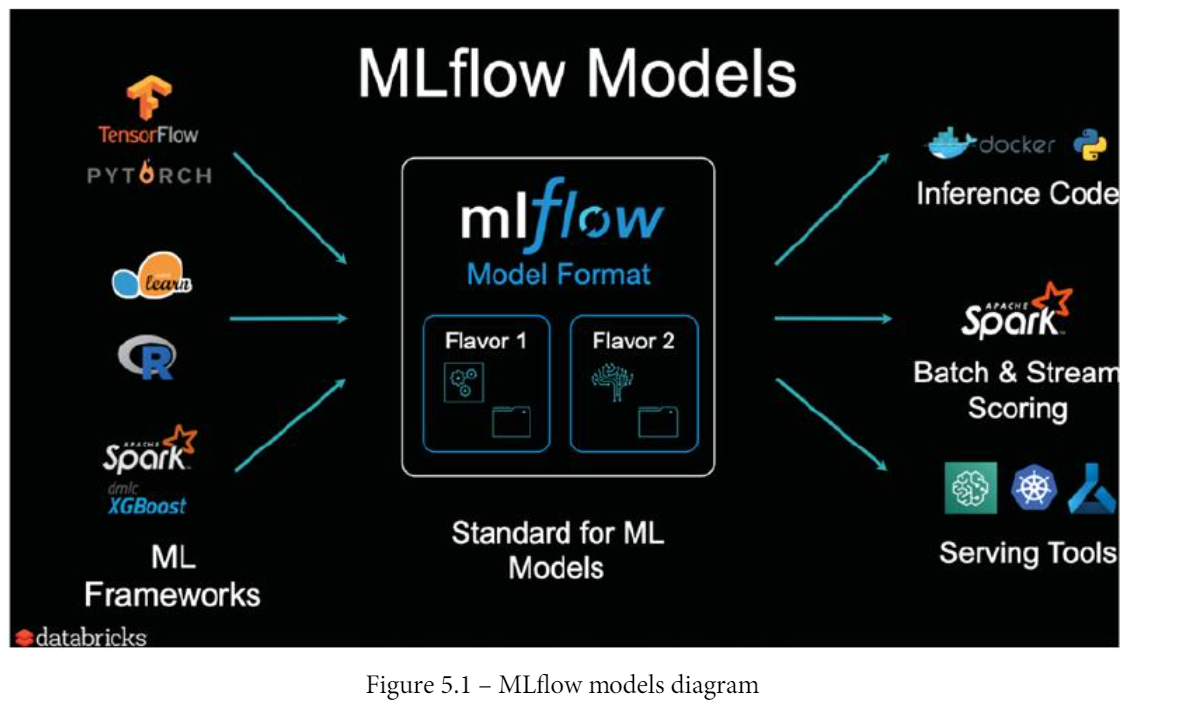

L'élément central de la définition des modèles MLflow est le fichier de model  MLflow, comme illustré dans la capture d'écran suivante :

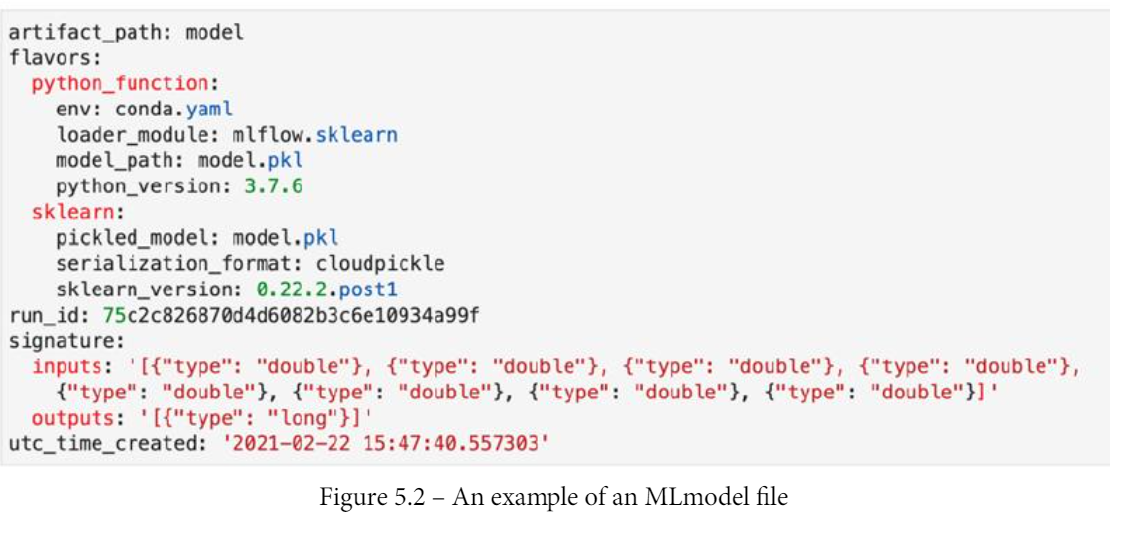

Un exemple de MLmodel peut être vu dans la Figure 5.2 et fournit les informations suivantes :

* run_id : il s'agit d'une référence à l'exécution du modèle du projet qui a permis la création du modèle.

* time_created : l'horodatage du moment où le modèle a été créé.

* flavors : les flavors sont différents types de modèles, qu'il s'agisse des modèles natifs (TensorFlow, Keras, sklearn, etc.) pris en charge par MLflow ou du modèle pyfunc fourni par MLflow.

* signature : c'est le composant du MLmodel qui définit la signature du modèle et vous permet, d'une certaine manière, de saisir le processus d'inférence de votre modèle. Il permet la validation des données d'entrée qui doivent correspondre à la signature du modèle.

Le module MLflow Models vous offre la possibilité de déployer vos modèles dans un environnement natif de la bibliothèque de votre modèle ou dans un environnement MLflow générique interopérable appelé pyfunc. Cette fonction est prise en charge dans tout environnement prenant en charge Python, offrant une flexibilité au déployeur du modèle sur la meilleure façon d'exécuter le modèle une fois connecté à MLflow:

* 1. Dans le référentiel GitHub du projet, accédez au dossier Gradflow et démarrez l'environnement de ce chapitre en exécutant la commande suivante :


    make

2. Vous pouvez exécuter toutes les cellules, y compris la cellule modèle illustrée à la figure 5.3 :

In [ ]:
mlflow.set_experiment("Baseline_Predictions_Mlflow_Check")
mlflow.tensorflow.autolog()

model = keras.Sequential([
  keras.layers.Dense(
    units=36,
    activation='relu',
    input_shape=(X_train.shape[-1],)
  ),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(units=1, activation='sigmoid'),
])

model.compile(
  optimizer=keras.optimizers.Adam(lr=0.001),
  loss="binary_crossentropy",
  metrics="Accuracy"
)

with mlflow.start_run(run_name='keras_model_baseline') as run:
    model.fit(X_train, y_train, epochs=20, validation_split=0.05, shuffle=True,verbose=)

Le modèle de code devrait être très similaire à celui utilisé dans le chapitre 4, Experiment Management in MLflow. En utilisant mlflow.start_run, vous pouvez commencer à enregistrer votre modèle dans MLflow et utiliser les capacités innées de la plate-forme pour capturer les détails pertinents du modèle en cours de développement.

3. Vous pouvez maintenant explorer le fichier MLmodel dans MLflow :


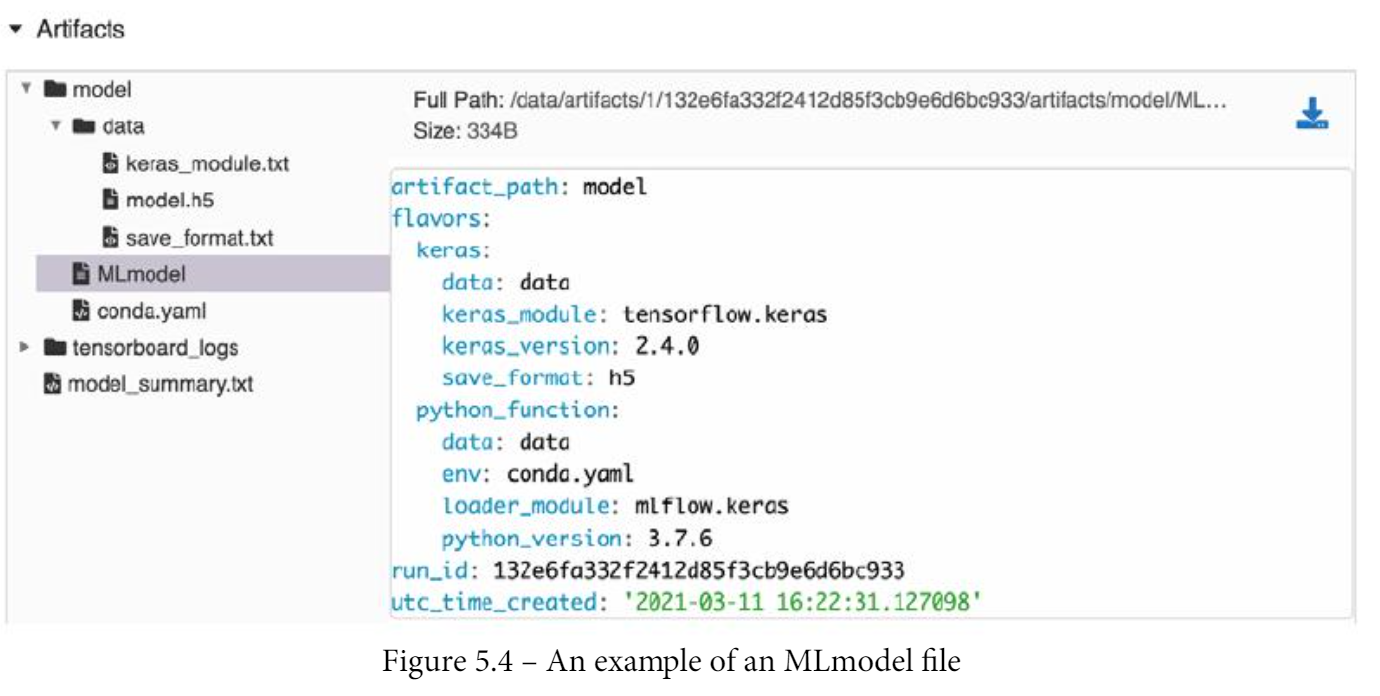

4. Explorez le fichier conda dans MLflow :

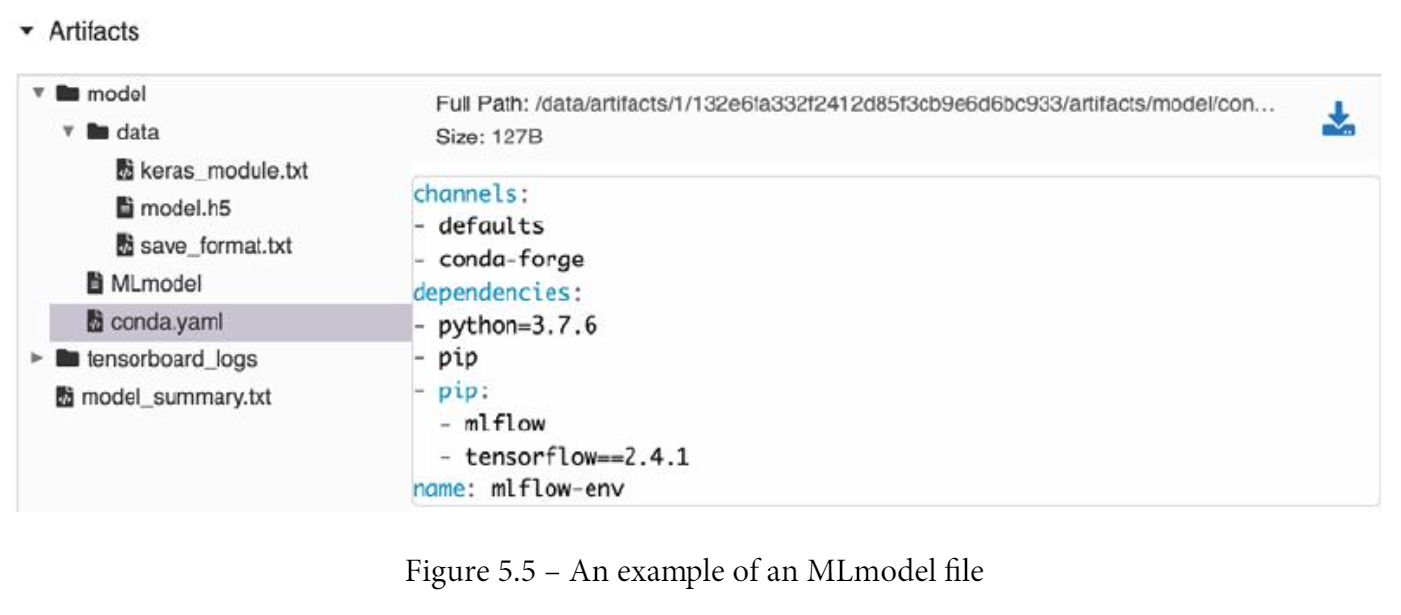

5. Chargez le modèle en tant que MLflow Pyfunc pour la prédiction :

In [ ]:
import mlflow
logged_model = '/data/artifacts/1/132e6fa332f2412d85f3cb9e6d6bc933/artifacts/model'

# Load model as a PyFuncModel.
loaded_model = mlflow.pyfunc.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(X_test))

Alternativement, le modèle peut être chargé au format natif H5 Keras et chargé dans une application complètement différente, comme illustré à la Figure 5.4, en utilisant le fichier /data/model/model.h5.


Après avoir introduit dans cette section le concept de modèles dans MLflow, nous allons maintenant approfondir un peu les différents types de modèles dans MLflow.

## Explorer les saveurs de modèle dans MLlow 

Les saveurs de modèle dans MLlow sont essentiellement les différents modèles de différentes bibliothèques prises en charge par MLlow. Cette fonctionnalité permet à MLflow de gérer les types de modèles avec des bibliothèques natives de chaque modèle spécifique et de prendre en charge certaines des fonctionnalités natives des modèles. 

La liste suivante présente une sélection de modèles représentatifs pour décrire et illustrer le support disponible dans MLflow :

* mlflow.tensorflow : TensorFlow est de loin l'une des bibliothèques les plus utilisées, particulièrement orientée vers l'apprentissage en profondeur. MLflow s'intègre nativement au format du modèle et aux capacités de surveillance en enregistrant les journaux aux formats TensorBoard. La journalisation automatique est prise en charge dans MLflow pour les modèles TensorFlow. Le modèle Keras de la figure 5.5 est un bon exemple de prise en charge de TensorFlow dans MLflow.

* • mlflow.h2o : H2O est une plate-forme d'apprentissage automatique complète orientée vers l'automatisation des modèles et avec certaines fonctionnalités qui se chevauchent avec MLflow. MLflow offre la possibilité de charger (load_model) et de journaliser des modèles (log_model) au format natif H2O, permettant l'interopérabilité entre les outils. Malheureusement, à partir de la version actuelle de MLflow, vous ne pouvez pas utiliser la journalisation automatique sur les modèles h2o :

In [ ]:
mlflow.h2o.load_model(...)
mlflow.h2o.log_model(...)

* mlflow.spark : MLflow s'intègre nativement à la bibliothèque Apache Spark via deux interfaces principales : Spark MLlib pour le machine learning et la plateforme MLeap (https://combust.github.io/mleap-docs/). Mleap est plus une plate-forme de déploiement tandis que MLlib est plus une bibliothèque que vous pouvez ajouter à vos projets


Une liste très complète de saveurs/formats est prise en charge par MLflow et leur utilisation et leur prise en charge peuvent être consultées ici https://www.mlflow.org/docs/latest/python_api/index.html

## Modèles personnalisés

Nous pouvons approfondir le prochain extrait de code et le modèle personnalisé RandomPredictor. Tant que vous fournissez une classe avec une interface avec les méthodes d'ajustement et de prédiction, vous pouvez avoir votre propre modèle MLflow personnalisé :

In [ ]:
class RandomPredictor(mlflow.pyfunc.PythonModel):
  def __init__(self):
    pass

  def fit(self):
    pass

  def predict(self, context, model_input):
    return model_input.apply(lambda column: random.randint(0,1))

Dans la classe précédente, nous utilisons essentiellement une probabilité aléatoire, et elle peut être utilisée comme exemple de modèle dans un système où vous voulez vous assurer que votre modèle est meilleur qu'un modèle aléatoire. Dans cette section, nous avons introduit différents types des saveurs des modèles et la création d'un mode personnalisé. Nous examinerons ensuite certains des schémas et caractéristiques de signature de MLflow.

## Gestion des signatures de modèle et des schémas

Une caractéristique importante de MLflow est de fournir une abstraction pour les schémas d'entrée et de sortie des modèles et la possibilité de valider les données du modèle pendant la prédiction et l'apprentissage. MLflow génère une erreur si votre entrée ne correspond pas au schéma et signature du modèle lors de la prédiction : 

1. Nous examinerons ensuite une liste de codes d'un modèle simple de classification des chiffres (les détails de l'ensemble de données sont disponibles ici :https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits). Le code suivant aplatit l'image dans un DataFrame pandas et associe un modèle à l'ensemble de données :

In [ ]:
# flatten the images
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import mlflow


digits = datasets.load_digits()
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.003)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# enable autologging
mlflow.sklearn.autolog()

# Learn the digits on the train subset
with mlflow.start_run():
    clf.fit(X_train, y_train)

2. Nous examinerons la liste de code précédente, que vous pouvez exécuter dans un nouveau bloc-notes et naviguer dans l'interface utilisateur MLflow pour étudier plus en profondeur le modèle ML généré à la figure 5.6 :

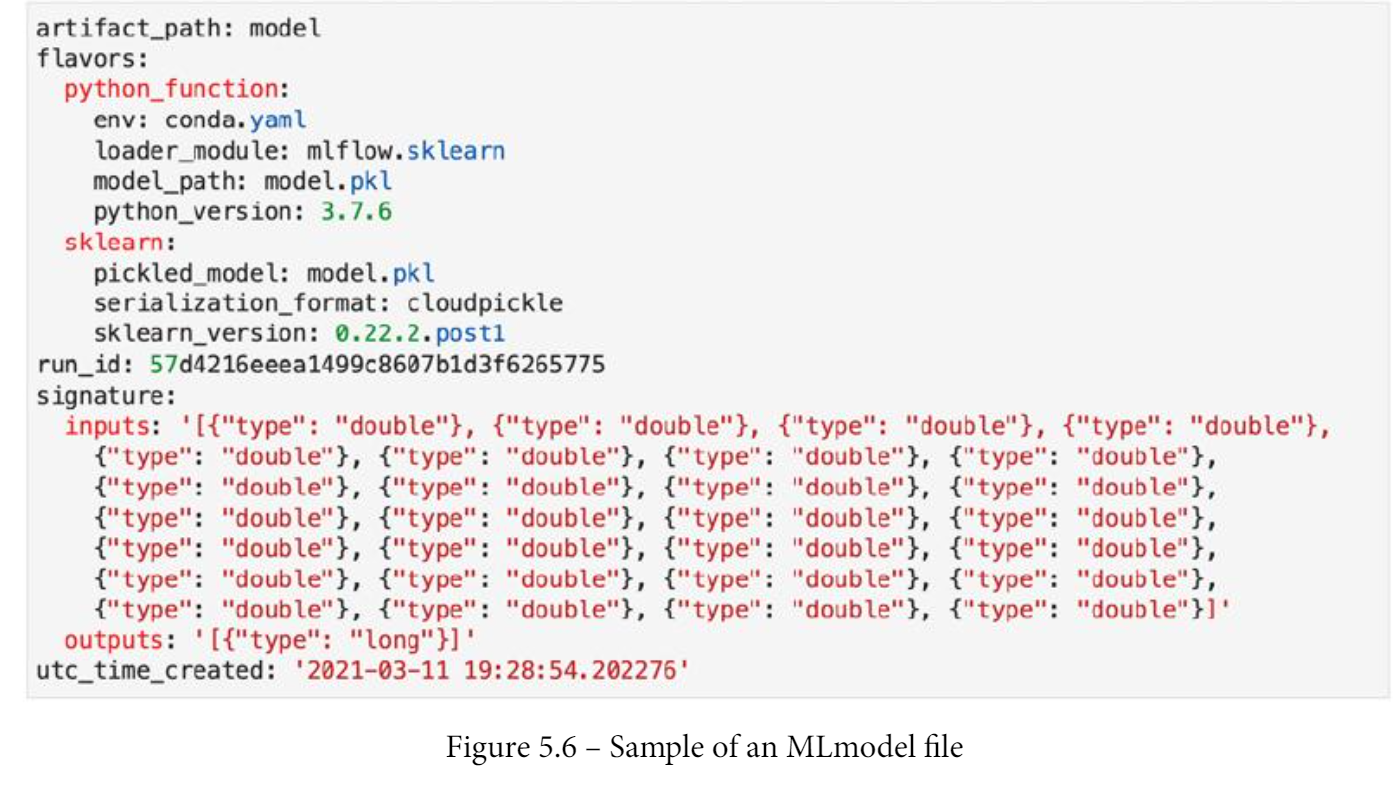

3. Le chier MLmodel contient la signature en JSON des fichiers d'entrée et de sortie. Pour certaines des saveurs enregistrées automatiquement, nous ne pourrons pas déduire la signature automatiquement afin que vous puissiez fournir la signature en ligne lors de l'enregistrement du modèle :

In [ ]:
# flatten the imagesfrom mlflow.models.signature 

import infer_signature

with mlflow.start_run(run_name=’untuned_random_forest’):
  signature = infer_signature(X_train,
                              wrappedModel.predict(None, X_train))
  mlflow.pyfunc.log_model(“random_forest_model”,
                          python_model=wrappedModel,
                          signature=signature)

Dans le bloc de code précédent, la signature du modèle est fournie par la méthode infer_signature. Comme le modèle est enregistré via log_model, la signature est fournie. Un avantage important des signatures enregistrées avec le modèle est qu'elles peuvent servir de documentation et de métadonnées pour le modèle. Les systèmes tiers peuvent consommer les métadonnées et interagir avec les modèles en validant les données ou en générant de la documentation pour les modèles. Dans cette section, nous avons présenté le schéma de modèle et les fonctionnalités de signature des modèles MLflow. Nous allons maintenant passer à l'autre module critique de cet espace, à savoir le registre modèle.

## Présentation de Model Registry

MLflow Model Registry est un module dans MLflow qui comprend un magasin centralisé pour les modèles, une API permettant la gestion du cycle de vie d'un modèle dans un registre. Un workflow typique pour un développeur de modèle d'apprentissage automatique est acquérir des données d'entraînement ; nettoyer, traiter et former des modèles ; et à partir de là, passer la main à un système ou à une personne qui déploie les modèles. Dans les très petits environnements, où vous avez une personne responsable de cette fonction, c'est assez trivial. 

Des défis et des frictions commencent à apparaître lorsque la variété et la quantité de modèles dans une équipe commencent à évoluer. Voici une sélection de points de friction communs soulevés par les développeurs d'apprentissage automatique en ce qui concerne le stockage et la récupération de modèles :

* Collaboration au sein d'équipes plus importantes
* Suppression progressive des modèles obsolètes en production
* La provenance d'un modèle
* Un manque de documentation pour les modèles
* Identification du bon version d'un modèle
* Comment intégrer le modèle aux outils de déploiement


L'idée principale derrière MLflow Model Registry est de fournir un modèle de magasin central dans une organisation où tous les modèles pertinents sont stockés et peuvent être consultés par les humains et les systèmes. Une bonne analogie serait un référentiel Git pour les modèles avec des métadonnées pertinentes associées et une gestion d'état centralisée pour les modèles


Dans l'interface utilisateur de MLflow (disponible dans votre environnement local), vous devez cliquer sur l'onglet sur le côté droit des expériences avec l'étiquette Modèles comme indiqué par la flèche : 

1. Grâce à ce module, vous pouvez lister tous les modèles enregistrés, rechercher par nom ou créer par nom. Pour chaque modèle, vous pouvez voir l'étiquette de la dernière version et les versions spécifiques qui sont en préparation ou en production :

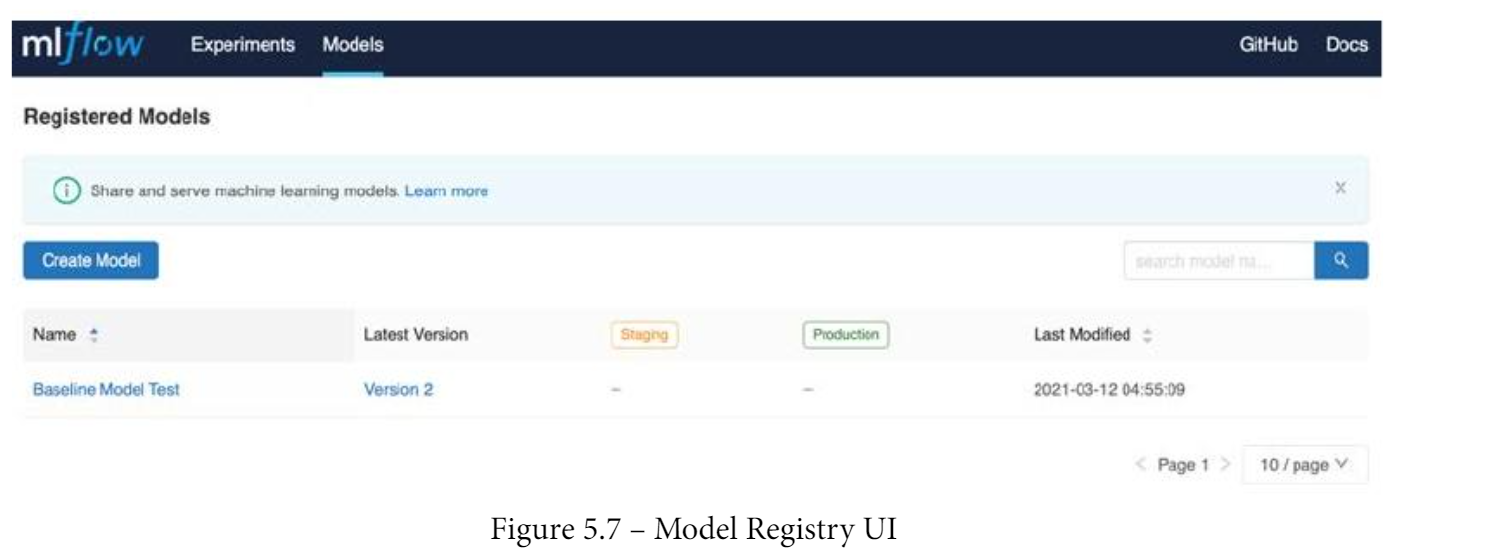

2. Un nouveau modèle peut être créé en cliquant sur le bouton Créer un modèle où un nom pertinent peut être donné à un modèle spécifique, comme illustré à la Figure 5.8 :


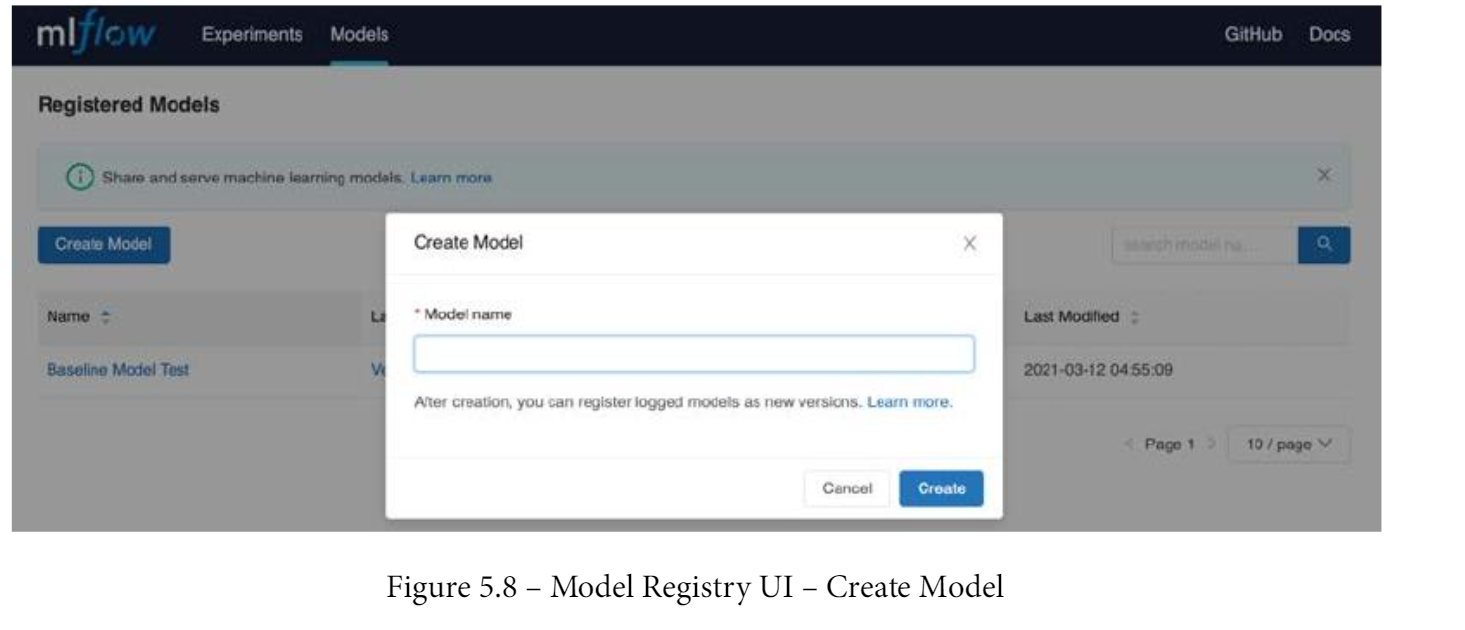

3. Vous pouvez également créer des modèles dans MLflow en exécutant le modèle Experiments et en choisissant l'un de vos modèles, et à partir de là, en décidant spécifiquement d'enregistrer le modèle. Vous devrez associer votre course à un modèle existant ou créer un nouveau nom de modèle à associer à ce type particulier de modèle par la suite :

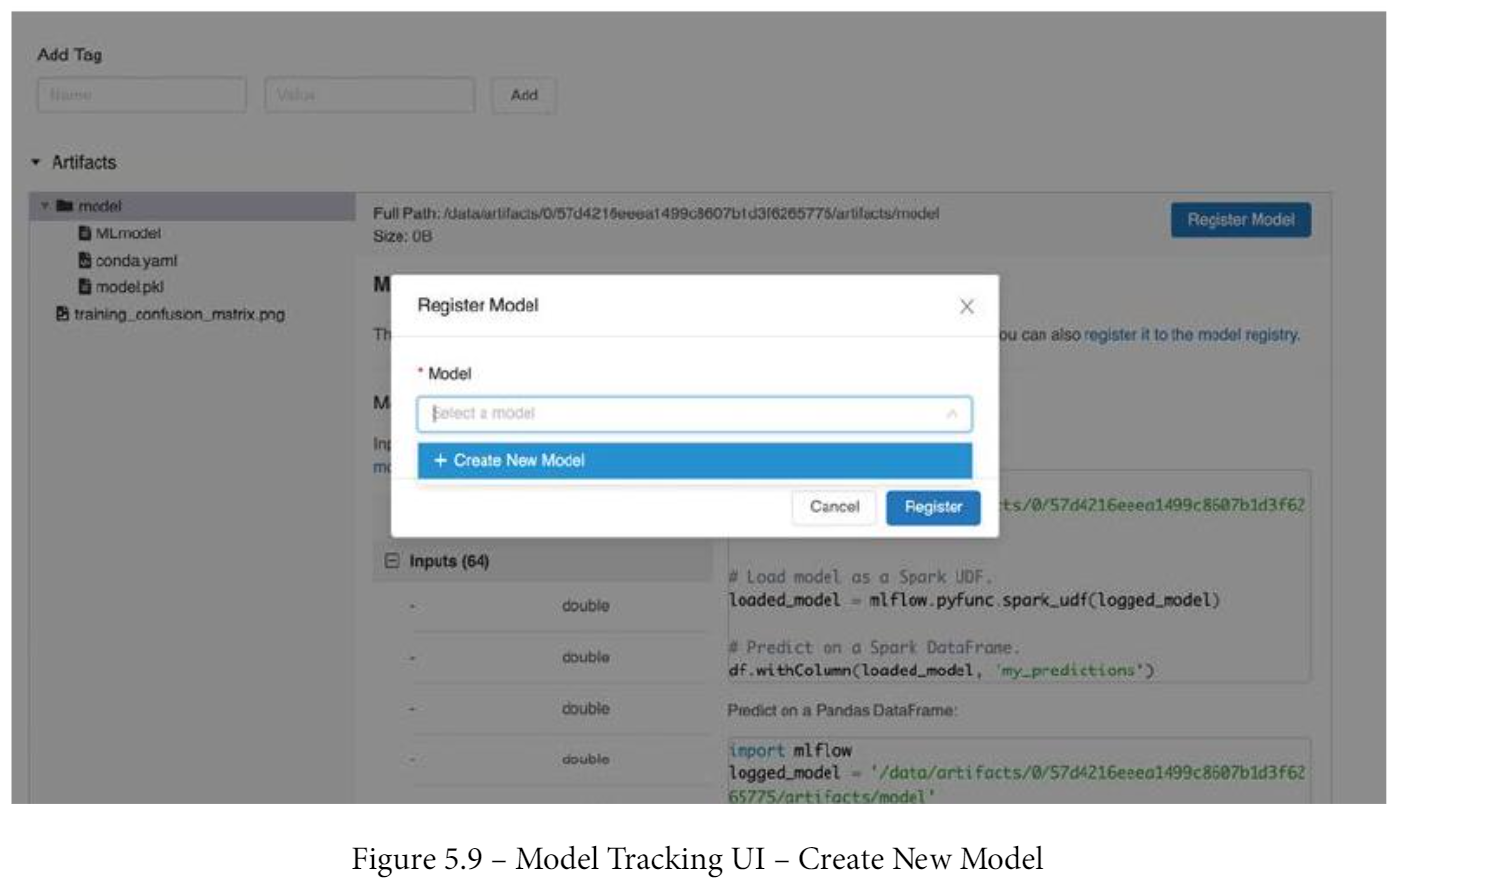

Lorsque vous ajoutez un nouveau modèle, MLflow augmente automatiquement la version et étiquette cette version comme la dernière version et tout le monde dans l'organisation peut interroger le registre pour la dernière version d'un modèle pour un problème donné.

## Ajouter votre meilleur modèle au registre de modèles 

Tout ce qui peut être fait dans l'interface utilisateur de MLflow peut également être implémenté via l'API MLflow. Nous pouvons rapidement revenir à notre cas d'utilisation de prédiction boursière et ajouter notre premier modèle de référence à Modélisez le registre et exécutez le bloc-notes hyperopt_optimization_logistic_regression_mlflow.ipynb, disponible dans le référentiel de ce chapitre, et triez les exécutions en fonction des métriques de score F1 par ordre décroissant, comme représenté par la figure 5.10 :

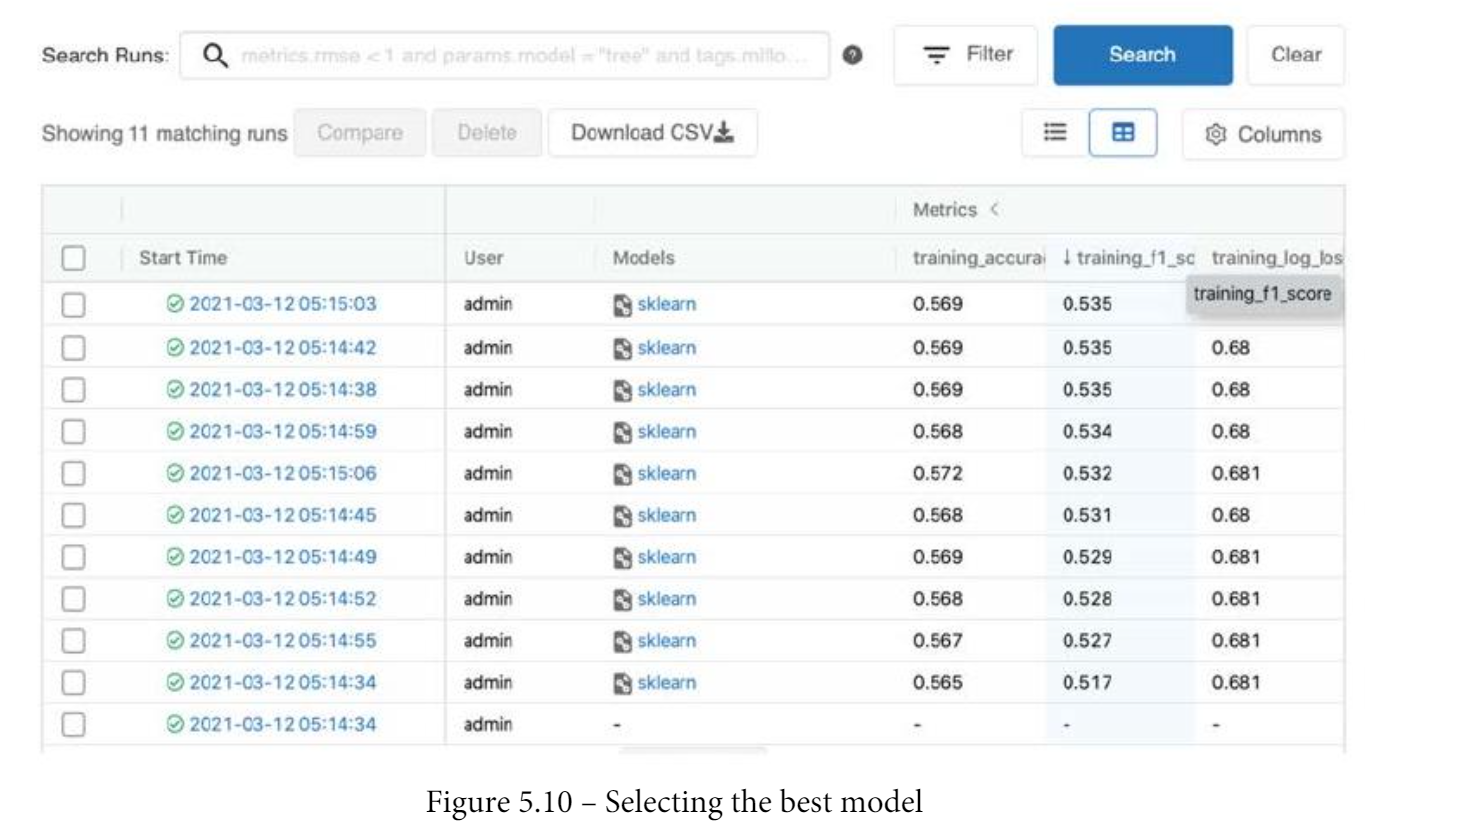

À partir de là, vous devriez pouvoir enregistrer le meilleur modèle avec le nom BTC StockPrediction, comme représenté sur la figure 5.11 :

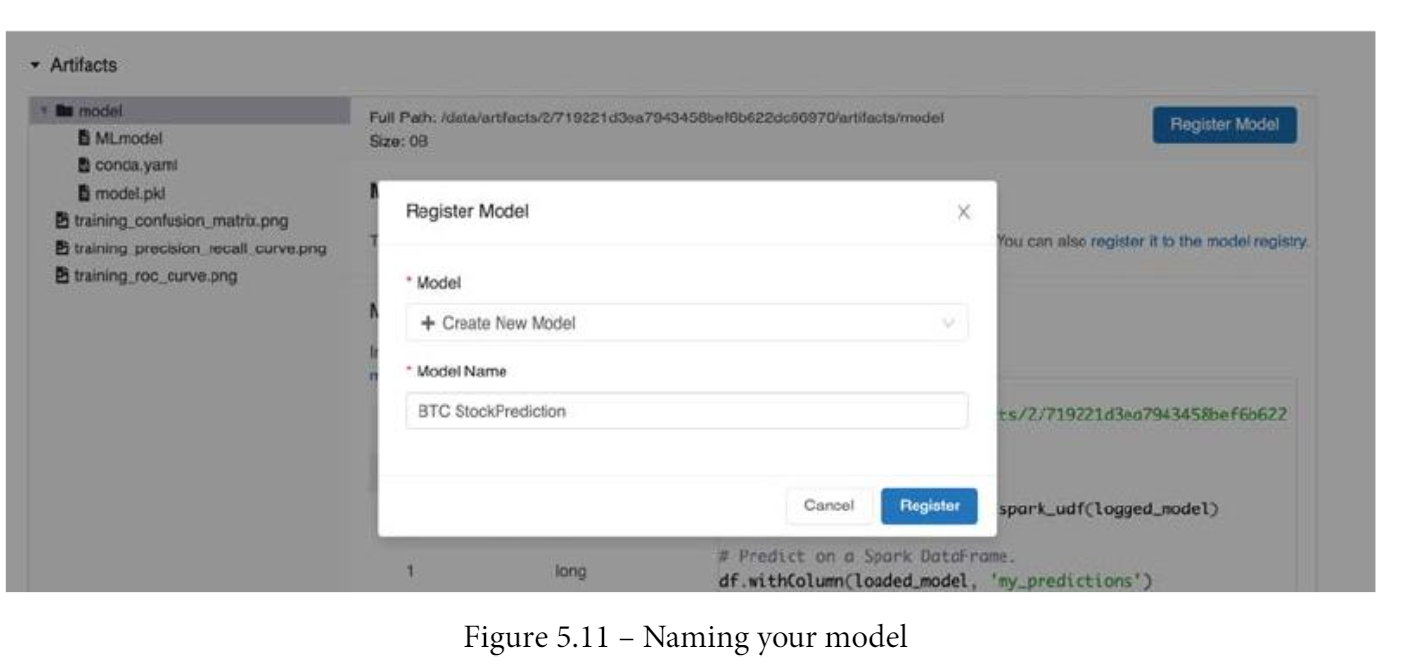

En revenant au module des modèles, vous remarquerez, comme représenté sur la Figure 5.12, votre modèle nouvellement créé sous la Version 1 :

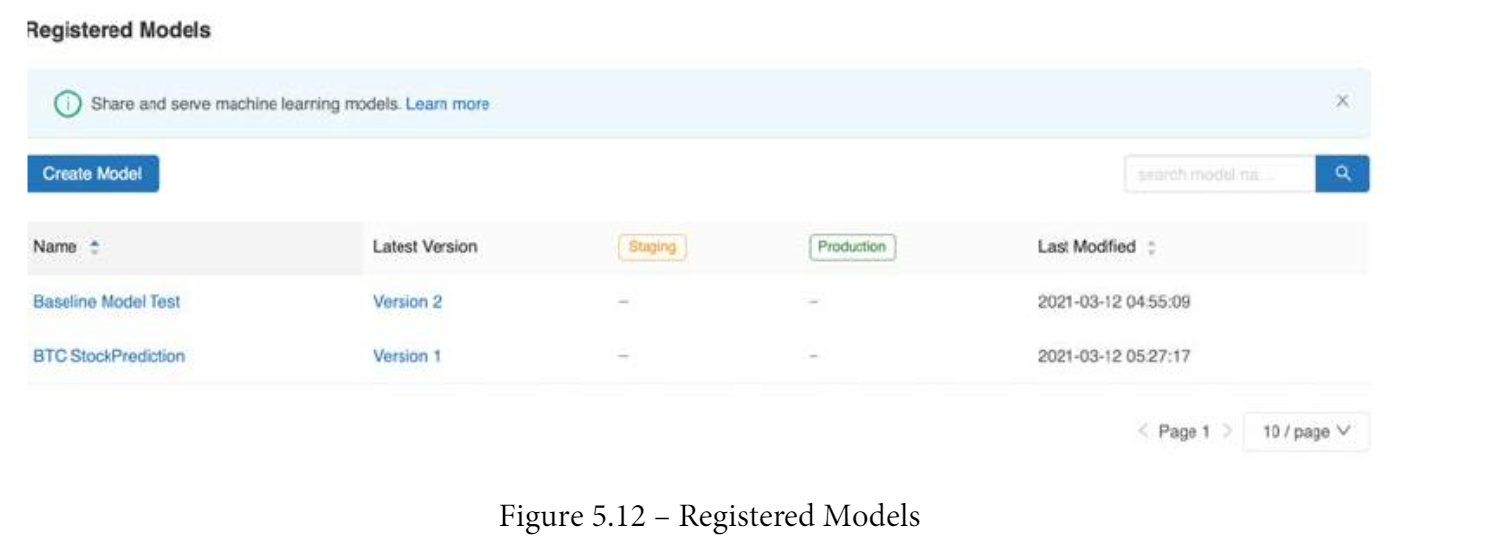

Après avoir présenté les fonctionnalités de Model Registry, dans la section suivante, nous décrirons un cycle de vie de développement de modèle pour vous aider à organiser la gestion de vos modèles.

## Gérer le cycle de vie du développement du modèle 

La gestion du cycle de vie du modèle est très importante lorsque l'on travaille dans une équipe de plusieurs développeurs de modèles. Il est assez courant pour plusieurs développeurs de modèles d'essayer différents modèles au sein du même projet, et il est assez important qu'un examinateur décide du modèle qui finira par être mis en production :

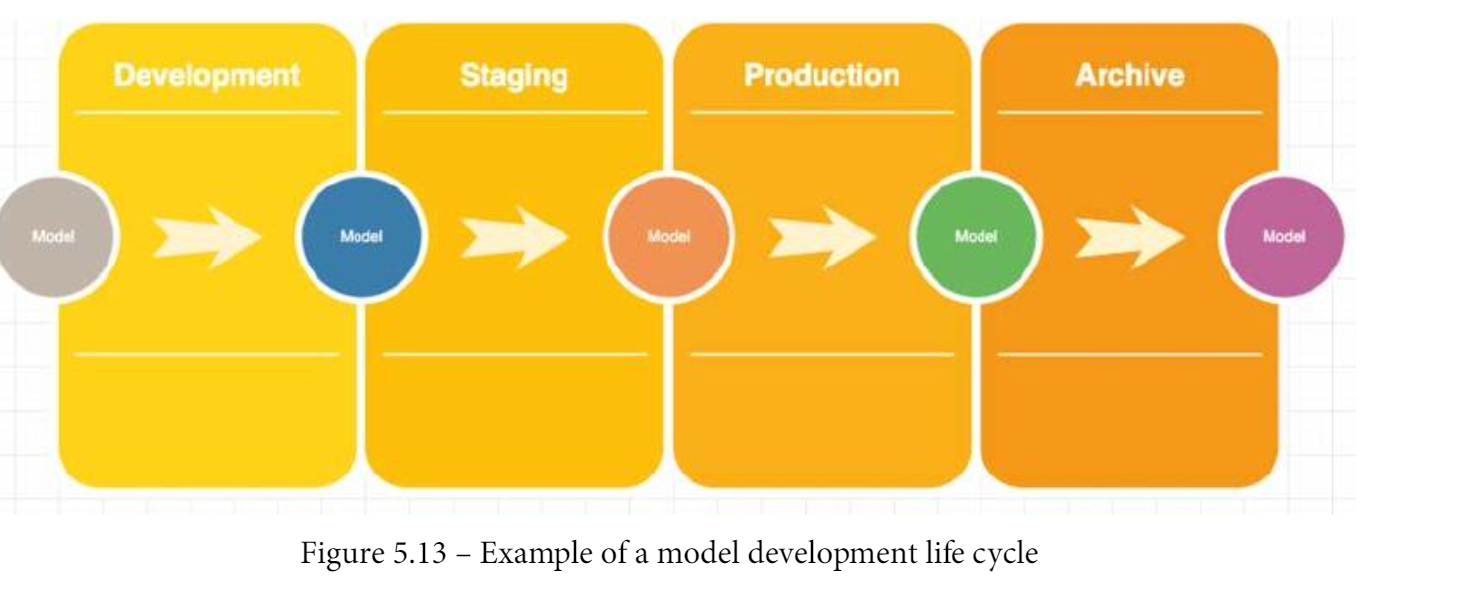

Un modèle dans son cycle de vie peut passer par les étapes suivantes s'il utilise un cycle de vie similaire à celui représenté sur la figure 5.13 : Trouver une solution raisonnable à leur problème d'apprentissage automatique.

* Développement : l'état où le développeur de modèles explore et expérimente toujours différentes approches et essaie toujours de trouver une solution raisonnable à son problème d'apprentissage automatique.

* Staging : l'état où le modèle peut être testé automatiquement avec un trafic de type production
* Production : lorsque le modèle est prêt à gérer un trafic de production réel. 
* Archivage : lorsque le modèle ne sert plus l'objectif commercial pour lequel il a été initialement développé, il sera archivé et ses métadonnées stockées pour référence future ou conformité.


Par exemple, un réviseur ou un superviseur, comme représenté dans la Figure 5.14, peut déplacer un modèle de l'état de développement à l'état de préparation pour un déploiement ultérieur dans un environnement de test et le modèle peut passer en production s'il est approuvé par les réviseurs :

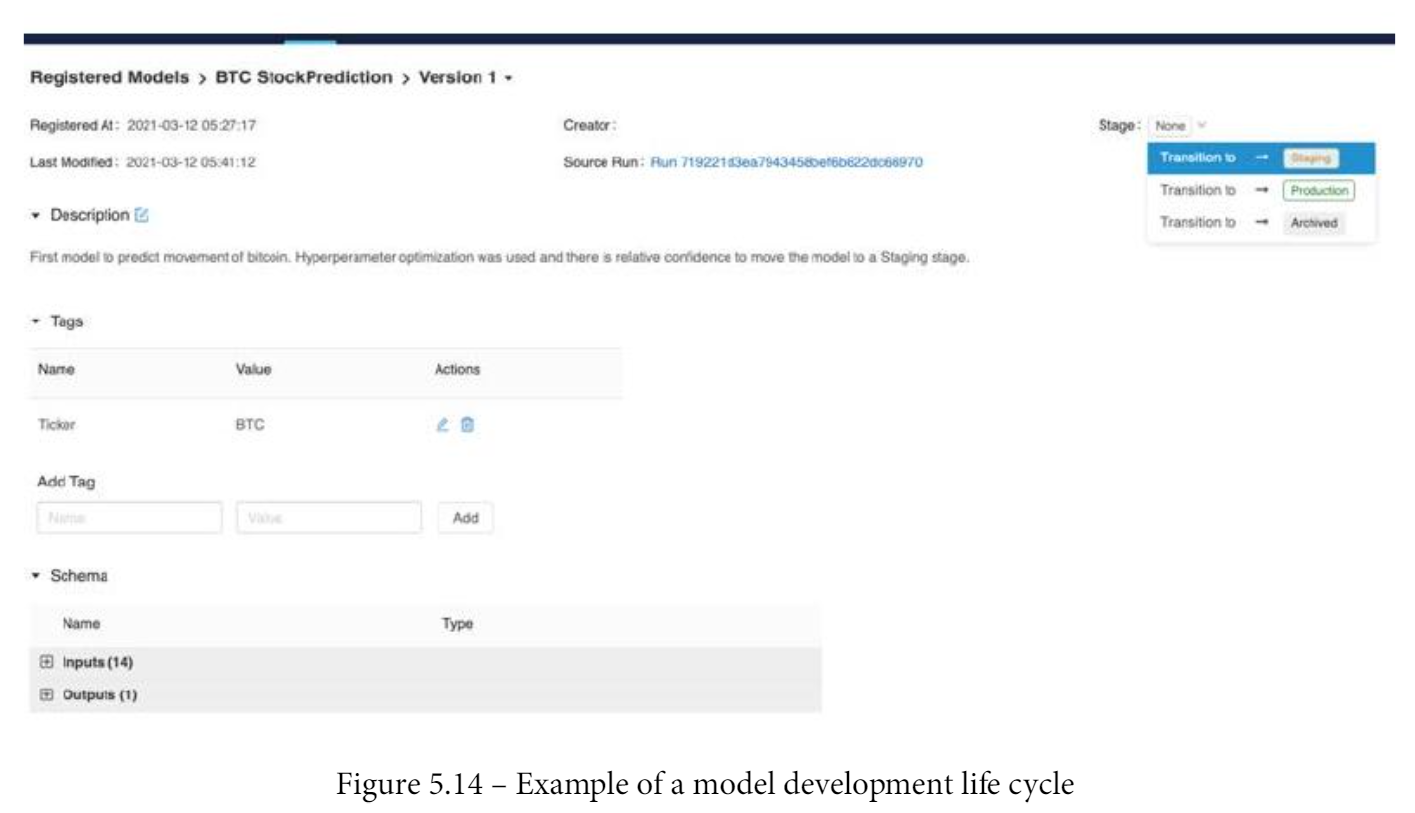

Lors de la transition d'un état dans MLflow, vous avez la possibilité d'envoyer le modèle dans un état existant à l'état suivant :

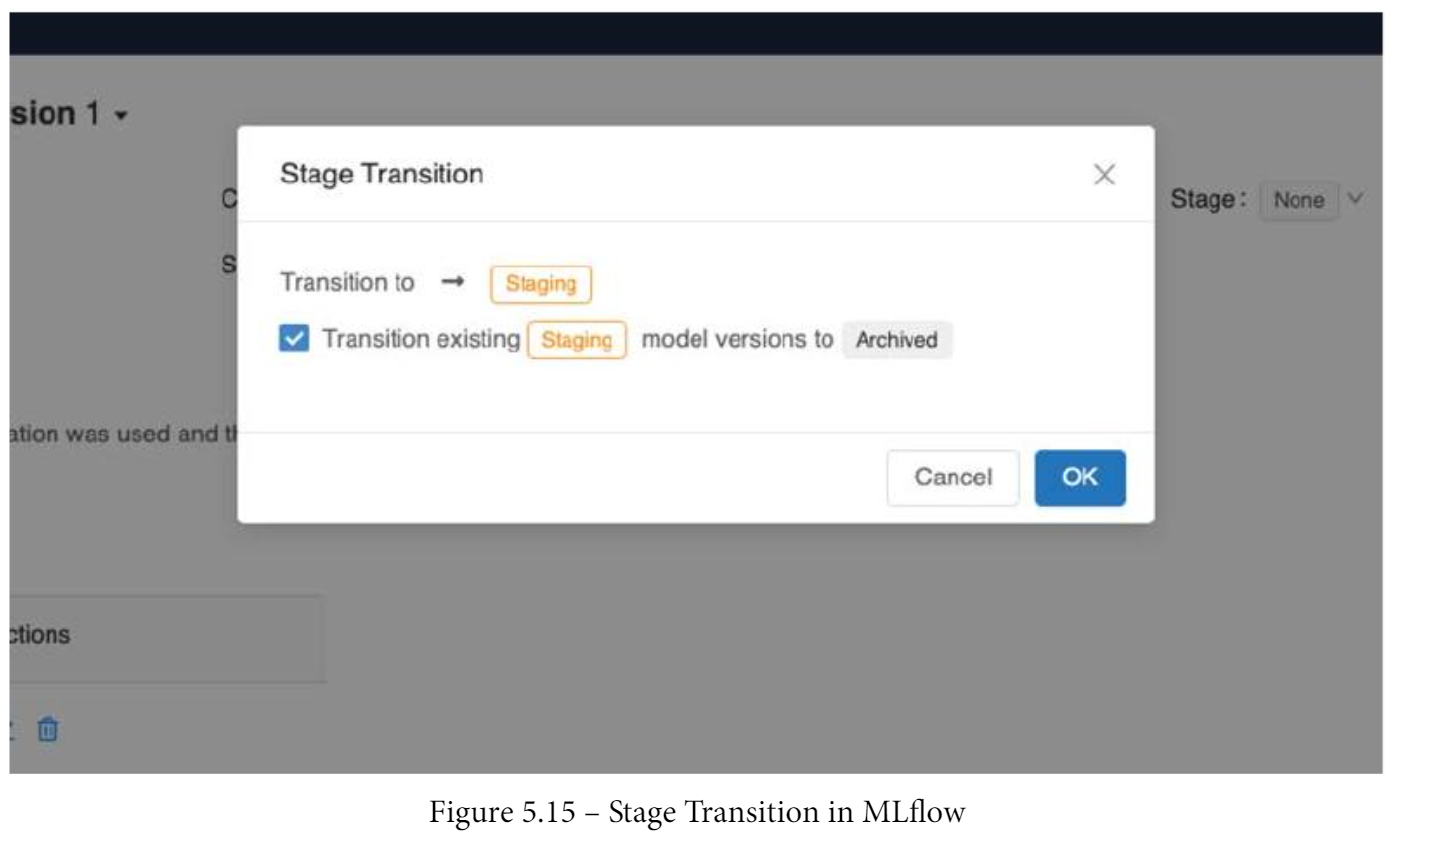

Les transitions des étapes de Staging à Production dans un environnement mature sont censées se faire automatiquement, comme nous le démontrerons dans les prochains chapitres du guide. Avec cette section, nous avons conclu la description des fonctionnalités liées aux modèles en MLflow.